In [1]:
import networkx as nx
import numpy as np

## Implementation of a custom powerlaw function

In [2]:
def powerlaw_function(k, tao, k_small):
    if k == 0:
        return 0
    else:
        return 50 * np.power(k, -tao, dtype=float) * np.power(np.e, -(k/k_small), dtype=float)

In [3]:
ys = []
for k in np.arange(0, 20, 1):
    ys.append(powerlaw_function(k,  3, 20))

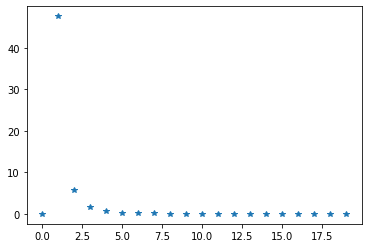

In [4]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot(list(np.arange(0, 20, 1)), ys, '*')
plt.show()

## Generate a Watts Strogatz Graph

In [6]:
#graph = nx.watts_strogatz_graph(100000, 10, 0.5)
graph = nx.read_gexf("graph.gexf")

## Count edges to plot the graph

In [8]:
from collections import defaultdict
from tqdm import tqdm

counter = defaultdict(int)

for node in tqdm(graph):
    counter[node] = len(graph.edges(node))

100%|██████████| 100000/100000 [00:01<00:00, 61634.73it/s]


In [9]:
group = defaultdict(lambda: [])
distribution = defaultdict(int)

for key, value in tqdm(counter.items()):
    group[value].append(key)
    
for key, value in tqdm(group.items()):
    distribution[key] = len(value)
distribution

100%|██████████| 16/16 [00:00<00:00, 58002.48it/s]


defaultdict(int,
            {8: 13623,
             13: 5908,
             11: 16635,
             9: 19539,
             7: 6438,
             10: 20532,
             6: 1953,
             15: 1089,
             12: 10915,
             14: 2624,
             5: 258,
             16: 368,
             17: 86,
             18: 28,
             19: 3,
             20: 1})

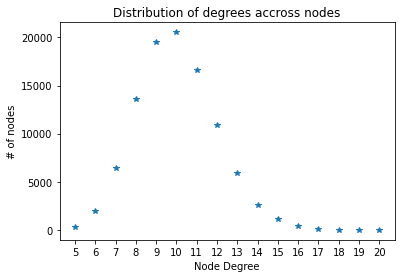

In [11]:

distribution = dict(sorted(distribution.items()))
keys = distribution.keys()
values = distribution.values()

plt.title("Distribution of degrees accross nodes")
plt.rcParams["figure.figsize"] = (10, 6)
plt.xticks(list(keys))
plt.plot(keys, values, '*')
plt.xlabel("Node Degree")
plt.ylabel("# of nodes")
plt.show()

## Read and write the graph

In [ ]:
nx.write_edgelist(graph, path="edges.edgelist", delimiter=':')

In [7]:
new_graph = nx.Graph()
new_graph = nx.read_edgelist(path="edges.edgelist", delimiter=':')

## The giant component (there is only one connected component)

In [12]:
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
G0 = graph.subgraph(Gcc[0])

In [9]:
new_graph = nx.write_gexf(graph, "graph.gexf")


In [31]:
new_graph  = nx.read_gexf("graph.gexf")

In [32]:
new_graph

In [33]:
test = nx.Graph()
test.add_edge(1, 2)

In [35]:
test.nodes()

NodeView((1, 2))

In [13]:
len(Gcc)

1